# Expected Emphatic-TD on Baird’s counterexample

Figure 11.6 shows the trajectory in expectation of the components of the parameter vector (for the case in which $I_t=1, \forall t$).

In [1]:
from IPython.display import Image

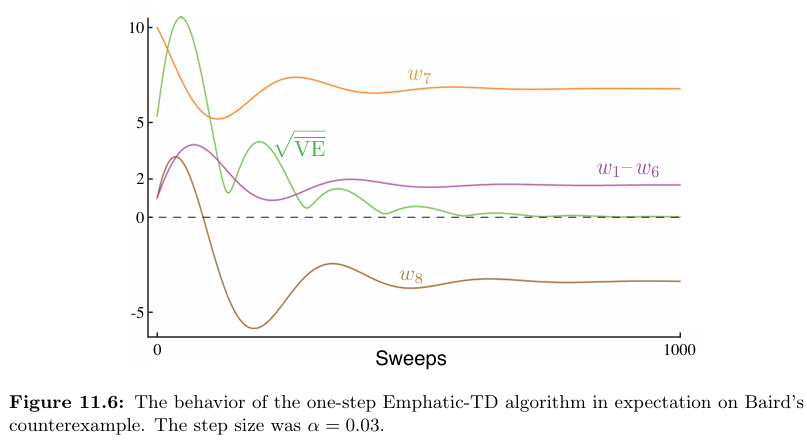

In [2]:
Image(filename="../book_images/Figure_11_6.PNG")

- There are some oscillations but eventually everything converges and the $\overline{VE}$ goes to 0.
- These trajectories are obtained by iteratively computing the expectation of the parameter vector trajectory without any of the variance due to sampling of transitions and rewards.
- We do not show the results of applying the Emphatic-TD algorithm directly because its variance on Baird’s counterexample is so high that it is nigh impossible to get consistent results in computational experiments.
- The algorithm converges to the optimal solution in theory on this problem, but in practice it does not.

In [ ]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from tqdm import tqdm

matplotlib.use('Agg')

In [ ]:
from src.counter_example import feature_vector_size, expected_emphatic_TD, compute_RMSVE

In [ ]:
# Initialize the weights vector (denoted as for 𝒘)
weights = np.ones(feature_vector_size)
weights[6] = 10

In [ ]:
# Step-size parameter (denoted as 𝛼)
step_size = 0.03

# Number of sweeps
sweeps = 1000

In [ ]:
# Create a weights matrix of size feature vector size * number of sweeps filled with 0s
weights_matrix = np.zeros((feature_vector_size, sweeps))

# Initialize RMS-VE
RMS_VE = np.zeros(sweeps)

# Initialize emphasis
emphasis = 0.0

In [ ]:
# For every sweep
for sweep in tqdm(range(sweeps)):
    # get expected next emphasis using expected ETD algorithm
    emphasis = expected_emphatic_TD(weights, emphasis, step_size)
    
    # record weights vector into weights matrix
    weights_matrix[:, sweep] = weights
    
    # calculate RMS-VE
    RMS_VE[sweep] = compute_RMSVE(weights)

In [ ]:
# Plotting
for i in range(feature_vector_size):
    plt.plot(weights_matrix[i, :], label=fr"$w_{i + 1}$")

In [ ]:
plt.plot(RMS_VE, label=r"$\sqrt{\overline{VE}}$")
plt.xlabel("Sweeps")
plt.title("Expected Emphatic TD")
plt.legend()

In [ ]:
plt.savefig("../generated_images/figure_11_6.png")
plt.close()